# ws 15

In [1]:
from tensorflow.keras.models import load_model

model = load_model('digitmodel.h5') # 

In [2]:
model.summary()
model.get_config()['layers'][0]

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,036 (879.05 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

{'module': 'keras.layers',
 'class_name': 'InputLayer',
 'config': {'batch_shape': (None, 28, 28, 1),
  'dtype': 'float32',
  'sparse': False,
  'name': 'input_layer_4'},
 'registered_name': None}

In [3]:
import tensorflow as tf
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_float_model = converter.convert()

f = open('digit_float.tflite', "wb")
f.write(tflite_float_model)
f.close()

float_model_size = len(tflite_float_model) / 1024
print('Float model size = %d KBs.' % float_model_size)

INFO:tensorflow:Assets written to: C:\Users\ASUS\AppData\Local\Temp\tmpbreem6mi\assets


INFO:tensorflow:Assets written to: C:\Users\ASUS\AppData\Local\Temp\tmpbreem6mi\assets


Saved artifact at 'C:\Users\ASUS\AppData\Local\Temp\tmpbreem6mi'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='input_layer_4')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  2366417542736: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2366417542928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2366417544080: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2366417544656: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2366417547344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2366417547920: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2366417546768: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2366417549456: TensorSpec(shape=(), dtype=tf.resource, name=None)
Float model size = 882 KBs.


In [4]:
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

quantized_model_size = len(tflite_quantized_model) / 1024
print('Quantized model size = %d KBs,' % quantized_model_size)
print('which is about %d%% of the float model size.'\
      % (quantized_model_size * 100 / float_model_size))

f = open('digit_quantized.tflite', "wb")
f.write(tflite_quantized_model)
f.close()

INFO:tensorflow:Assets written to: C:\Users\ASUS\AppData\Local\Temp\tmpnkrbt90z\assets


INFO:tensorflow:Assets written to: C:\Users\ASUS\AppData\Local\Temp\tmpnkrbt90z\assets


Saved artifact at 'C:\Users\ASUS\AppData\Local\Temp\tmpnkrbt90z'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='input_layer_4')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  2366417542736: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2366417542928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2366417544080: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2366417544656: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2366417547344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2366417547920: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2366417546768: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2366417549456: TensorSpec(shape=(), dtype=tf.resource, name=None)
Quantized model size = 226 KBs,
which is about 25% of the float model size.


In [7]:
import numpy as np
import matplotlib.pyplot as plt 
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.image import rgb_to_grayscale
from PIL import Image, ImageOps

img = load_img('digit2.png', target_size=(28, 28)) # 

img = ImageOps.invert(img)
img = img_to_array(img)
img = rgb_to_grayscale(img)
img = img / 255.0

test_image = np.expand_dims(img, axis=0) 

print('shape=',test_image.shape)
print('max pixel value=',np.min(img),np.max(img))
print(test_image.shape)

shape= (1, 28, 28, 1)
max pixel value= 0.0 0.99990004
(1, 28, 28, 1)


input shape: [ 1 28 28  1]
Total prediction time:  0.0
2
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


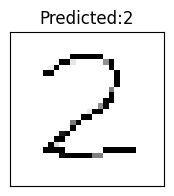

In [8]:
import tensorflow as tf
from time import time

tflite_path = 'digit_float.tflite' 


interpreter = tf.lite.Interpreter(model_path=tflite_path)
interpreter.allocate_tensors()

input = interpreter.get_input_details()
input_shape = input[0]['shape']
print('input shape:', input_shape)

input_tensor_index = input[0]["index"]
output = interpreter.tensor(interpreter.get_output_details()[0]["index"])

interpreter.set_tensor(input_tensor_index, test_image) # 

time_start = time()
interpreter.invoke()

time_end = time()
total_tflite_time = time_end - time_start
print("Total prediction time: ", total_tflite_time)

digit = np.argmax(output()[0])
print(digit)
print(output().round(2))

plt.figure(figsize=(2, 2))
plt.imshow(test_image[0], cmap=plt.cm.gray_r)
plt.title('Predicted:{}'. format(digit))
plt.xticks([]) ; plt.yticks([])
plt.show()